In [1]:
#handy functions from Data Wrangling activities
#import RentPredictionChallenge as wrangle
import datetime
from RentPredictionChallenge import *
from xgboost import XGBClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
#import lightgbm as lgb
from sklearn.linear_model import LinearRegression

In [ ]:
X,y,dummy_X,dummy_y = returnTrainTestSet(
                                boxCoxTranformation(preProcessTheData(readTheData('TestData_PA.csv'))),
                                .99999,
                                1986)

In [ ]:
def experiment1():
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            boxCoxTranformation(preProcessTheData(removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv'))))),
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment1()

##### It is for sure GradientBoostingRegressor vs XGBRegressor avail a high validation score.

In [ ]:
def experiment2():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop('CollegeGrads',axis=1)
    printCorr(df)
    #return
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment2()
#experiment2()

###### It is evident that co related feature removal did help to increase the score for all the regressor.

In [ ]:
def experiment3():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    printCorr(df)
    #return
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment3()

In [ ]:
#with scaling between 1,2
def experiment4():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    printCorr(df)
    #return
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment4()

##### Scaling between 0-1 and 1-2 has no impact 

What next?
1. rent_per_bed
2. confirm if 2 features removal has increased the score?
3. transforming boolean data types
4. transforming boolean data types and shrinking feature to PCA(10)
5. PCA(10) right away
6. with no rent transformation with practical use of modelling in mind - rent
7. with no rent transformation with practical use of modelling in mind - rent per bed
8. can we have have related featues(3 categories) forming 3 features and then perform rent predictions.
9. removing time feature: lotsize, time
10. neural network {there would so many combination here}

Let us re-order the above list:
* confirm if 2 features removal has increased the score?
* removing time feature: lotsize, time
* with no rent transformation with practical use of modelling in mind - rent
* rent_per_bed
* with no rent transformation with practical use of modelling in mind - rent per bed
* PCA(10) right away
* transforming boolean data types
* transforming boolean data types and shrinking feature to PCA(10)
* can we have have related featues(3 categories) forming 3 features and then perform rent predictions.
* neural network {there would so many combination here}

In [ ]:
def checkIfFeatureRemoved():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    #df['rent_per_']
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(cross_cv)
checkIfFeatureRemoved()

##### With CollegeGrads and Census_Vacancy removed:
array([0.78162104, 0.77902842, 0.77416637, 0.77451817, 0.77583158,
       0.77235315, 0.77999664, 0.78130302, 0.78070535, 0.77399241,
       0.77742186])


In [ ]:
list_temp = [0.78162104, 0.77902842, 0.77416637, 0.77451817, 0.77583158, 0.77235315, 0.77999664, 0.78130302, 0.78070535, 0.77399241, 0.77742186]

print(np.average(list_temp))

##### Without removing the features:
array([0.77113593, 0.7723527 , 0.77144092, 0.77619224, 0.77209543,
       0.77119765, 0.76799843, 0.77142307, 0.77876057, 0.77299295,
       0.77214368])

In [ ]:
list_temp = [0.77113593, 0.7723527 , 0.77144092, 0.77619224, 0.77209543, 0.77119765, 0.76799843, 0.77142307, 0.77876057, 0.77299295, 0.77214368]
print(np.average(list_temp))

##### It cannot be proved that we have increase in the score with this approach.

In [ ]:
def checkIfRentNotNormalized():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    #df['rent_per_']
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(cross_cv)
checkIfRentNotNormalized()

##### It is a disaster :(. I do not understand the reason though. It may be because too little values predicting too high values. so how do we actually predict the actual rent ?

In [ ]:
def checkIfRentPerBed():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(preProcessTheData((df)))
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(cross_cv)
checkIfRentPerBed()

##### It is a very good sign. Data visualization has really helped us :)

In [ ]:
def checkIfNoTimeEstimate():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(preProcessTheData((df)))
    #df=df.drop([2015.25, 2015.5, 2015.75, 2016.25],axis=1)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = checkIfNoTimeEstimate()
#dummy.fit(dummy_X, dummy_y)

In [ ]:
def printSortedFeatures(clf,X,y):
    clf.fit(X,y)
    feature_importances = clf.feature_importances_
    features = list(X)

    a =[]
    for i in range(0,len(features)):
        a.append((features[i], feature_importances[i]))
    print(sorted(a, key=lambda x: x[1], reverse=True))
    
printSortedFeatures(dummy, dummy_X,dummy_y)

##### Above relation between feature and feature importance score clearly indicates the impact of the feature removal impact. For example, removing lotsize will have no impact on the outcome because the weight for the feature is anyways 0. we may also see the ratio difference between the feature and the top weighted feature (rent per bed) to understand the probable impact due to removal of one.

In [ ]:
def checkIfNoTime():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = checkIfNoTime()
printSortedFeatures(dummy, dummy_X,dummy_y)

In [ ]:
def checkBoolTransformation():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    #df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = checkBoolTransformation()
printSortedFeatures(dummy, dummy_X,dummy_y)

##### It is clear that dummies did not make difference. Both pool_yes and pool_no have zero weight. 
##### Before transformation : ('garage', 0.008583691) :: Post Transformation : ('garage_yes', 0.008583691),  ('garage_no', 0.0)

In [ ]:
def getNPca(df, n):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n)
    ttt = df.drop('rent',axis=1)
    arr = pca.fit_transform(ttt)
    df_plot = pd.DataFrame(arr)
    df_plot['rent'] = df['rent']

    return df_plot


In [ ]:
def checknPCA(n):
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    #df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    df = getNPca(df,n)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=11, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

for i in range(5,35,5):
    dummy, dummy_X,dummy_y = checknPCA(i)
    printSortedFeatures(dummy, dummy_X,dummy_y)

##### Clearly, more meaning features high is the score. PCA projects the weak features on the high influencing features and hence there is a possibility the gravity of the feature might get lost because of low projection score.

##### XGBoost comes to rescue here by identifying the right weights for each features/variables. Therefore, PCA is no longer required.

In [ ]:
def checkMLPRegressor():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    #df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    #df = getNPca(df,n)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    #y_train = np.array(df['rent'])
    
    from sklearn.neural_network import MLPRegressor
    clf = MLPRegressor()
    cv = ShuffleSplit(n_splits=5, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(" Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = checkMLPRegressor()
#printSortedFeatures(dummy, dummy_X,dummy_y)    

##### Need to dig deep into various network but let us first fine tune XGBoost. The one who consistently gave us high score.
https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

The above blog indicates XGBoost is better than random NN.

#### We will try the stacking approach as mentioned in:

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [ ]:
def predictNA():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    

    #printCorr(df)
    #print(df.head())
    
    df = removeOutlier(removeDuplicate(df))
    df2 = df.copy()
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    #df=df.drop([2015.25, 2015.5,'lotsize','pool','halfbath'],axis=1)
    #df = getNPca(df,n)
    #
    printCorr(df)
    #df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)

    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    le = preprocessing.LabelEncoder()
    df2 = df2.fillna('NA')
    df2 = df2[df2.property_type != 'NA']
    y_train_new = le.fit_transform(df2.property_type.tolist())
    X_test_NA = X_train[X_train.NA == 2]
    X_train = X_train[X_train.NA != 2]
    X_train.drop(['Condo','Triplex', 'SFR','NA','Quadplex'], axis=1)
    '''y_train_new = pd.DataFrame()
    y_train_new[2015.25] = X_train[2015.25]
    y_train_new[2015.5] = X_train[2015.5]
    y_train_new[2015.75] = X_train[2015.75]
    y_train_new[2016.25] = X_train[2016.25]'''
    
    print(y_train_new)
    #return
    clf = XGBClassifier()
    cv = ShuffleSplit(n_splits=5, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train_new,cv=cv, scoring='accuracy',n_jobs=3)
    print(cross_cv," Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = predictNA()
#printSortedFeatures(dummy, dummy_X,dummy_y)    

##### Failed again in predicting the property type with high accuracy.

In [ ]:
def sepClfForProp(property_type_str='all', n_splits=11):
    df = readTheData('TrainData_PA.csv')
    print(Counter(df.property_type))
    
    if property_type_str != 'all':
        df = df[df.property_type == property_type_str]
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)

    df = removeOutlier(removeDuplicate(df))
    
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))

    printCorr(df)
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            .99999,
            random.randint(1,1000))
    
    clf = XGBRegressor()
    cv = ShuffleSplit(n_splits=n_splits, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
    #print(datetime.datetime())
    cross_cv = cross_val_score(clf,X_train,y_train,cv=cv, scoring='r2',n_jobs=3)
    print(cross_cv," Median Score : ", np.median(cross_cv), "Average Score : ", np.average(cross_cv) )
    
    return(clf, X_train, y_train)

dummy, dummy_X,dummy_y = sepClfForProp('SFR')
printSortedFeatures(dummy, dummy_X,dummy_y)    

##### Clearly there is a percentage increase in the prediction score.

In [ ]:
def checkifSepClfTest():
    clf_condo, X_condo,y_condo = sepClfForProp('Condo',2)
    clf_condo.fit(X_condo,y_condo)
    
    clf_sfr, X_sfr,y_sfr = sepClfForProp('SFR',2)
    clf_sfr.fit(X_sfr,y_sfr)
    
    clf_gnr, X_gnr, y_gnr = sepClfForProp()
    clf_gnr.fit(X_gnr, y_gnr)
    
    df = readTheData('TestData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    '''df_condo = df[df.property_type == 'Condo']
    df_sfr = df[df.property_type == 'SFR']
    #df_gnr = df[!df.property_type.isna(['Condo','SFR'])]'''
    #clf_features = ['rent','garage_no', 'fireplace_no', 'yearbuilt', 'y', 'patio_yes', 'farmers_miles', 'pool_no', 'EmploymentDiversity', 'Census_Vacancy', 'x', 'Schools', 'sqft', 'lotsize', 'starbucks_miles', 'cemetery_dist_miles', 'z', 'hospital_miles', 'opt_dist_miles', 'garage_yes', 'WhiteCollar', 'nationalhighway_miles', 'bath', 'Crime_Rate', 'vet_dist_miles', 'fireplace_yes', 'walmart_miles', 'Unemployment', 'dentist_dist_miles', 'patio_no', 'halfbath', 'pool_yes', 'bed', '2015.25', '2015.5', '2015.75', '2016.25', 'CollegeGrads', 'Census_MedianIncome', 'railline_miles', 'physician_dist_miles', 'HomePrice', 'Condo']
    #clf_features = list(X_condo)
    #clf_features.append('rent')
    
    df_test = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    df_test_copy = df_test.copy()
    df_test = df_test[df_test.SFR != 2]
    df_test = df_test[df_test.NA != 2]
    df_test = df_test[df_test.Triplex != 2]
    df_test = df_test[df_test.Quadplex != 2]
    df_test = df_test[df_test.Duplex != 2]
    df_test = df_test.drop(['SFR','NA', 'Triplex', 'Quadplex', 'Duplex'],axis=1)

    printCorr(df_test)
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df_test,
            .99999,
            random.randint(1,1000))
    
    printStats(clf_condo.predict(X_train[X_condo.columns]),y_train)
    
    y_pred=y_actual = []
    y_pred += list(clf_condo.predict(X_train[X_condo.columns]))
    y_actual += list(y_train)
    print("Ys Condo: ",len(y_pred), len(y_actual))
    
    df_test = df_test_copy.copy()
    df_test = df_test[df_test.Condo != 2]
    df_test = df_test[df_test.NA != 2]
    df_test = df_test[df_test.Triplex != 2]
    df_test = df_test[df_test.Quadplex != 2]
    df_test = df_test[df_test.Duplex != 2]
    df_test = df_test.drop(['Condo','NA', 'Triplex', 'Quadplex', 'Duplex'],axis=1)
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df_test,
            .99999,
            random.randint(1,1000))
    
    printStats(clf_sfr.predict(X_train[X_sfr.columns]),y_train)
    
    y_pred += list(clf_sfr.predict(X_train[X_sfr.columns]))
    y_actual += list(y_train)
    print("Ys SFR: ",len(y_pred), len(y_actual))

    df_test = df_test_copy.copy()
    df_test = df_test[df_test.Condo != 2]
    df_test = df_test[df_test.SFR != 2]

    #df_test = df_test.drop(['Condo','SFR'],axis=1)
    
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df_test,
            .99999,
            random.randint(1,1000))
    
    printStats(clf_gnr.predict(X_train[X_gnr.columns]),y_train)
    
    y_pred += list(clf_gnr.predict(X_train[X_gnr.columns]))
    y_actual += list(y_train)
    print("Ys gnr: ",len(y_pred), len(y_actual))
    
    
    df_test = df_test_copy.copy()
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df_test,
            .99999,
            random.randint(1,1000))
    
    printStats(clf_gnr.predict(X_train[X_gnr.columns]),y_train)
    
    
    printStats(y_pred, y_actual)
checkifSepClfTest()

##### Need to check what went wrong in calculating the overall %. But 59.4% for +- 5% without hyper parameter tuning is good. Need to continue with stacked approach. Not sure I understand the concept very well so far.

In [19]:
def doGridSearch(i,j,X_train,y_train,X_test,y_test,X,df_test):

    my_model = XGBRegressor(max_depth=i,n_estimators=j)
    my_model.fit(X_train,y_train)

    print("\nWith max_depth =",i,"& n_estimator =",j,", Validation Score :",my_model.score(X_test,y_test))
    
    df_test['pred_rent_per_bed'] = np.exp(my_model.predict(X))
    df_test['pred_rent'] = df_test['pred_rent_per_bed'] * df_test['bed']
    print("Test Score r2 (post inverse function) : ", r2_score(df_test.rent, df_test.pred_rent))
    
    print("\n\nAs per Competetion Evaluation Metrics :")
    printStats(df_test.pred_rent, df_test.rent)

    return my_model.score(X_test,y_test), r2_score(df_test.rent, df_test.pred_rent)
        
def loopGridSearch():
    valid_score=[]
    test_score =[]
    max_depth = []
    n_estimator = []
    
    start_time = datetime.datetime.now()
    
    df_test = readTheData('TestData_PA.csv')
    
    '''df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)'''
    
    X,y = newBoxCoxTranformation(preProcessTheData((df_test)),'rent')
    
    #get the training data
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    df = removeOutlier(removeDuplicate(df))
    X_load, y_load = newBoxCoxTranformation(preProcessTheData((df)),'rent')
    
    for i in range(2,15,1):
        for j in range(100,800,100):
            X_train, X_test, y_train, y_test = train_test_split(X_load,
                                                                y_load,
                                                                test_size=0.3, 
                                                                random_state=random.randint(1,1000))
            
            valid_s, test_s = doGridSearch(i,j,X_train,y_train,X_test,y_test,X,df_test.copy())
            valid_score.append(valid_s)
            test_score.append(test_s)
            max_depth.append(i)
            n_estimator.append(j)
    
    plt_df = pd.DataFrame({'max_depth': max_depth,
                           'n_estimator': n_estimator,
                            'valid_score' : valid_score,
                            'test_score' : test_score,
                        })
    
    print("\n\nTotal time taken by the Custom GridSearch approach : ",datetime.datetime.now() - start_time )
    
    return plt_df

df_grid = loopGridSearch()
    

Shape of the data set before transforming :  (12132, 40)
Shape of the data set after transforming :  (12132, 44) 

Shape of the dataset before transformation :  (12132, 44)


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Shape of the dataset after transformation :  (12132, 43) (12132,)
Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Shape of the dataset after transformation :  (18079, 43) (18079,)

With max_depth = 2 & n_estimator = 100 , Validation Score : 0.780953399644095
Test Score r2 (post inverse function) :  0.7400486290316914


As per Competetion Evaluation Metrics :
3.7 % of properties within predicted rent within 1% of actual rent
7.53 % of properties within predicted rent within 2% of actual rent
11.22 % of properties within predicted rent within 3% of actual rent
14.78 % of properties within predicted rent within 4% of actual rent
18.46 % of properties within predicted rent within 5% of actual rent

With max_depth = 2 & n_estimator = 200 , Validation Score : 0.8040460316458871
Test Score r2 (post inverse function) :  0.7639929195037195


As per Competetion Evaluation Metrics :
4.12 % of properties within predicted rent within 1% of actual rent
8.2 % of properties within predicted rent within 2% of actual rent
12.04 % of properties within predicted rent within 3% of actual rent
16.18 % of properties wit


With max_depth = 4 & n_estimator = 300 , Validation Score : 0.8434828112631416
Test Score r2 (post inverse function) :  0.8104351845133868


As per Competetion Evaluation Metrics :
4.76 % of properties within predicted rent within 1% of actual rent
9.56 % of properties within predicted rent within 2% of actual rent
14.11 % of properties within predicted rent within 3% of actual rent
18.68 % of properties within predicted rent within 4% of actual rent
23.43 % of properties within predicted rent within 5% of actual rent

With max_depth = 4 & n_estimator = 400 , Validation Score : 0.8570584394711542
Test Score r2 (post inverse function) :  0.8044818579043619


As per Competetion Evaluation Metrics :
4.52 % of properties within predicted rent within 1% of actual rent
9.57 % of properties within predicted rent within 2% of actual rent
14.41 % of properties within predicted rent within 3% of actual rent
19.08 % of properties within predicted rent within 4% of actual rent
23.67 % of properti


With max_depth = 6 & n_estimator = 500 , Validation Score : 0.8651693067148442
Test Score r2 (post inverse function) :  0.818681774418375


As per Competetion Evaluation Metrics :
5.23 % of properties within predicted rent within 1% of actual rent
10.27 % of properties within predicted rent within 2% of actual rent
15.69 % of properties within predicted rent within 3% of actual rent
20.82 % of properties within predicted rent within 4% of actual rent
25.96 % of properties within predicted rent within 5% of actual rent

With max_depth = 6 & n_estimator = 600 , Validation Score : 0.8675904585374505
Test Score r2 (post inverse function) :  0.819746661151829


As per Competetion Evaluation Metrics :
5.51 % of properties within predicted rent within 1% of actual rent
10.79 % of properties within predicted rent within 2% of actual rent
15.57 % of properties within predicted rent within 3% of actual rent
20.76 % of properties within predicted rent within 4% of actual rent
25.91 % of properti


With max_depth = 8 & n_estimator = 700 , Validation Score : 0.8679736371780374
Test Score r2 (post inverse function) :  0.8268111330813686


As per Competetion Evaluation Metrics :
5.37 % of properties within predicted rent within 1% of actual rent
10.76 % of properties within predicted rent within 2% of actual rent
16.25 % of properties within predicted rent within 3% of actual rent
21.25 % of properties within predicted rent within 4% of actual rent
26.2 % of properties within predicted rent within 5% of actual rent

With max_depth = 9 & n_estimator = 100 , Validation Score : 0.8549337040918977
Test Score r2 (post inverse function) :  0.8161222689307347


As per Competetion Evaluation Metrics :
5.0 % of properties within predicted rent within 1% of actual rent
9.81 % of properties within predicted rent within 2% of actual rent
14.66 % of properties within predicted rent within 3% of actual rent
19.38 % of properties within predicted rent within 4% of actual rent
24.61 % of propertie


With max_depth = 11 & n_estimator = 200 , Validation Score : 0.8622766079731663
Test Score r2 (post inverse function) :  0.8227224478162026


As per Competetion Evaluation Metrics :
5.39 % of properties within predicted rent within 1% of actual rent
10.76 % of properties within predicted rent within 2% of actual rent
16.01 % of properties within predicted rent within 3% of actual rent
21.32 % of properties within predicted rent within 4% of actual rent
26.34 % of properties within predicted rent within 5% of actual rent

With max_depth = 11 & n_estimator = 300 , Validation Score : 0.8623561737814445
Test Score r2 (post inverse function) :  0.8273280617067893


As per Competetion Evaluation Metrics :
5.44 % of properties within predicted rent within 1% of actual rent
10.83 % of properties within predicted rent within 2% of actual rent
16.04 % of properties within predicted rent within 3% of actual rent
21.21 % of properties within predicted rent within 4% of actual rent
26.45 % of prop


With max_depth = 13 & n_estimator = 400 , Validation Score : 0.8583801683867958
Test Score r2 (post inverse function) :  0.8244740659738603


As per Competetion Evaluation Metrics :
5.71 % of properties within predicted rent within 1% of actual rent
10.78 % of properties within predicted rent within 2% of actual rent
16.17 % of properties within predicted rent within 3% of actual rent
21.32 % of properties within predicted rent within 4% of actual rent
26.31 % of properties within predicted rent within 5% of actual rent

With max_depth = 13 & n_estimator = 500 , Validation Score : 0.8612880244000307
Test Score r2 (post inverse function) :  0.8252489792044266


As per Competetion Evaluation Metrics :
5.65 % of properties within predicted rent within 1% of actual rent
11.27 % of properties within predicted rent within 2% of actual rent
16.82 % of properties within predicted rent within 3% of actual rent
22.09 % of properties within predicted rent within 4% of actual rent
27.16 % of prop

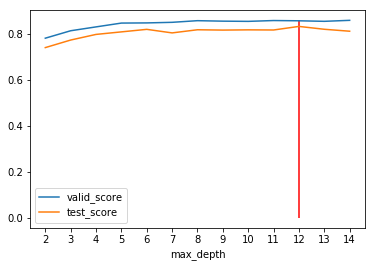

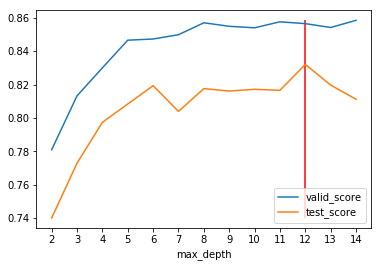

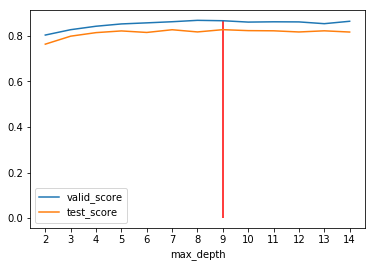

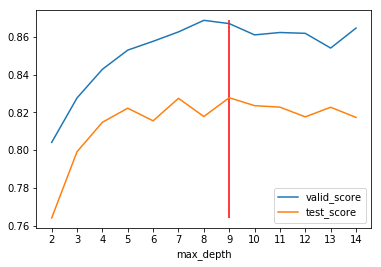

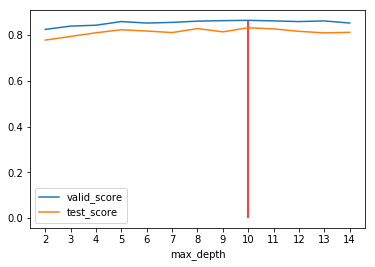

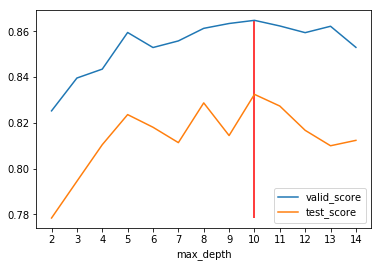

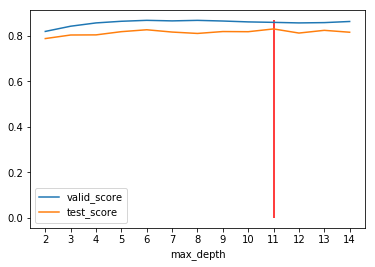

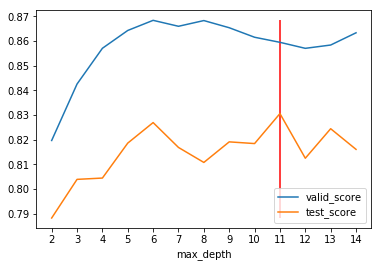

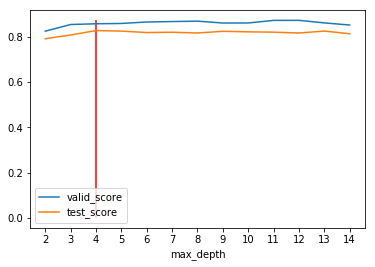

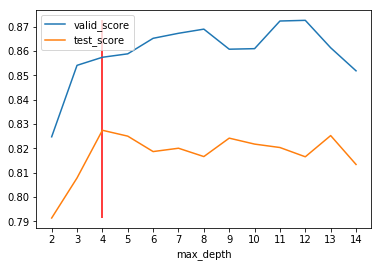

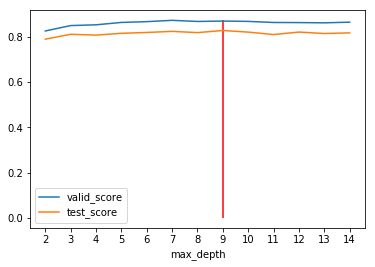

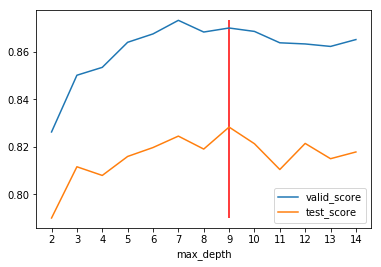

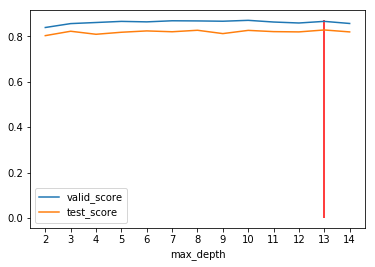

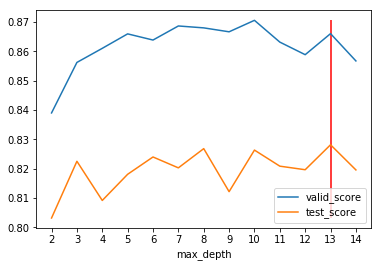

In [20]:
for i in df_grid.n_estimator.unique().tolist():
    plotDf(df_grid[df_grid.n_estimator == i])
    plotDf(df_grid[df_grid.n_estimator == i],0)

In [21]:
df_grid[df_grid.test_score == df_grid.test_score.max()]

,max_depth,n_estimator,valid_score,test_score
58,10,300,0.864815,0.832451


* With max_depth = 10 & n_estimator = 300 , Validation Score : 0.8648154590804821
* Test Score r2 (post inverse function) :  0.8324510160801218


* As per Competetion Evaluation Metrics :
  * 5.43 % of properties within predicted rent within 1% of actual rent
  * 10.83 % of properties within predicted rent within 2% of actual rent
  * 16.01 % of properties within predicted rent within 3% of actual rent
  * 21.34 % of properties within predicted rent within 4% of actual rent
  * 26.49 % of properties within predicted rent within 5% of actual rent

In [22]:
df_grid[df_grid.test_score.isin(df_grid.test_score.sort_values(ascending=False)[:5])].sort_values(by='test_score')

,max_depth,n_estimator,valid_score,test_score
54,9,600,0.870081,0.828366
44,8,300,0.861314,0.828713
66,11,400,0.859478,0.830605
70,12,100,0.856524,0.832088
58,10,300,0.864815,0.832451


In [23]:
def doGridSearchOld(i,j,X_train,y_train,X_test,y_test,X,df_test):

    my_model = XGBRegressor(max_depth=i,n_estimators=j)
    my_model.fit(X_train,y_train)

    print("\nWith max_depth =",i,"& n_estimator =",j,", Validation Score :",my_model.score(X_test,y_test))
    
    df_test['pred_rent'] = np.exp(my_model.predict(X))
    #df_test['pred_rent'] = df_test['pred_rent_per_bed'] * df_test['bed']
    print("Test Score r2 (post inverse function) : ", r2_score(df_test.rent, df_test.pred_rent))
    
    print("\n\nAs per Competetion Evaluation Metrics :")
    printStats(df_test.pred_rent, df_test.rent)

    return my_model.score(X_test,y_test), r2_score(df_test.rent, df_test.pred_rent)
        
def loopGridSearchOld():
    valid_score=[]
    test_score =[]
    max_depth = []
    n_estimator = []
    
    start_time = datetime.datetime.now()
    
    df_test = readTheData('TestData_PA.csv')
    
    '''df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)'''
    
    X,y = newBoxCoxTranformation(preProcessTheData((df_test)),'rent')
    
    #get the training data
    df = readTheData('TrainData_PA.csv')
    
    '''df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)'''
    
    df = removeOutlier(removeDuplicate(df))
    X_load, y_load = newBoxCoxTranformation(preProcessTheData((df)),'rent')
    
    for i in range(2,15,1):
        for j in range(100,800,100):
            X_train, X_test, y_train, y_test = train_test_split(X_load,
                                                                y_load,
                                                                test_size=0.3, 
                                                                random_state=random.randint(1,1000))
            
            valid_s, test_s = doGridSearchOld(i,j,X_train,y_train,X_test,y_test,X,df_test.copy())
            valid_score.append(valid_s)
            test_score.append(test_s)
            max_depth.append(i)
            n_estimator.append(j)
    
    plt_df = pd.DataFrame({'max_depth': max_depth,
                           'n_estimator': n_estimator,
                            'valid_score' : valid_score,
                            'test_score' : test_score,
                        })
    
    print("\n\nTotal time taken by the Custom GridSearch approach : ",datetime.datetime.now() - start_time )
    
    return plt_df

df_grid_old = loopGridSearchOld()
    

Shape of the data set before transforming :  (12132, 40)
Shape of the data set after transforming :  (12132, 44) 

Shape of the dataset before transformation :  (12132, 44)


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Shape of the dataset after transformation :  (12132, 43) (12132,)
Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Shape of the dataset after transformation :  (18079, 43) (18079,)

With max_depth = 2 & n_estimator = 100 , Validation Score : 0.7651967978927943
Test Score r2 (post inverse function) :  0.7139081238385834


As per Competetion Evaluation Metrics :
3.68 % of properties within predicted rent within 1% of actual rent
7.32 % of properties within predicted rent within 2% of actual rent
10.83 % of properties within predicted rent within 3% of actual rent
14.67 % of properties within predicted rent within 4% of actual rent
18.39 % of properties within predicted rent within 5% of actual rent

With max_depth = 2 & n_estimator = 200 , Validation Score : 0.7831599411371561
Test Score r2 (post inverse function) :  0.7630365958178484


As per Competetion Evaluation Metrics :
3.87 % of properties within predicted rent within 1% of actual rent
8.03 % of properties within predicted rent within 2% of actual rent
12.31 % of properties within predicted rent within 3% of actual rent
16.3 % of properties w


With max_depth = 4 & n_estimator = 300 , Validation Score : 0.8319959972589627
Test Score r2 (post inverse function) :  0.80210557523365


As per Competetion Evaluation Metrics :
4.87 % of properties within predicted rent within 1% of actual rent
9.75 % of properties within predicted rent within 2% of actual rent
14.17 % of properties within predicted rent within 3% of actual rent
18.86 % of properties within predicted rent within 4% of actual rent
23.29 % of properties within predicted rent within 5% of actual rent

With max_depth = 4 & n_estimator = 400 , Validation Score : 0.8345851628564634
Test Score r2 (post inverse function) :  0.8133307534350275


As per Competetion Evaluation Metrics :
5.07 % of properties within predicted rent within 1% of actual rent
9.72 % of properties within predicted rent within 2% of actual rent
14.23 % of properties within predicted rent within 3% of actual rent
19.14 % of properties within predicted rent within 4% of actual rent
23.85 % of properties


With max_depth = 6 & n_estimator = 500 , Validation Score : 0.8440952000579232
Test Score r2 (post inverse function) :  0.8022661722052183


As per Competetion Evaluation Metrics :
5.46 % of properties within predicted rent within 1% of actual rent
10.39 % of properties within predicted rent within 2% of actual rent
15.59 % of properties within predicted rent within 3% of actual rent
20.34 % of properties within predicted rent within 4% of actual rent
25.21 % of properties within predicted rent within 5% of actual rent

With max_depth = 6 & n_estimator = 600 , Validation Score : 0.8524067757219482
Test Score r2 (post inverse function) :  0.8140972768470778


As per Competetion Evaluation Metrics :
5.42 % of properties within predicted rent within 1% of actual rent
10.59 % of properties within predicted rent within 2% of actual rent
15.4 % of properties within predicted rent within 3% of actual rent
19.93 % of properties within predicted rent within 4% of actual rent
24.84 % of propert


With max_depth = 8 & n_estimator = 700 , Validation Score : 0.8477900163299464
Test Score r2 (post inverse function) :  0.8093824535862835


As per Competetion Evaluation Metrics :
5.12 % of properties within predicted rent within 1% of actual rent
10.59 % of properties within predicted rent within 2% of actual rent
15.64 % of properties within predicted rent within 3% of actual rent
20.61 % of properties within predicted rent within 4% of actual rent
25.76 % of properties within predicted rent within 5% of actual rent

With max_depth = 9 & n_estimator = 100 , Validation Score : 0.8406919186180941
Test Score r2 (post inverse function) :  0.7963460287570371


As per Competetion Evaluation Metrics :
5.01 % of properties within predicted rent within 1% of actual rent
9.83 % of properties within predicted rent within 2% of actual rent
14.54 % of properties within predicted rent within 3% of actual rent
19.16 % of properties within predicted rent within 4% of actual rent
24.1 % of properti


With max_depth = 11 & n_estimator = 200 , Validation Score : 0.8467476188351208
Test Score r2 (post inverse function) :  0.8054846315202471


As per Competetion Evaluation Metrics :
5.37 % of properties within predicted rent within 1% of actual rent
10.72 % of properties within predicted rent within 2% of actual rent
15.64 % of properties within predicted rent within 3% of actual rent
20.76 % of properties within predicted rent within 4% of actual rent
25.81 % of properties within predicted rent within 5% of actual rent

With max_depth = 11 & n_estimator = 300 , Validation Score : 0.8462899268992609
Test Score r2 (post inverse function) :  0.8086155630153042


As per Competetion Evaluation Metrics :
5.31 % of properties within predicted rent within 1% of actual rent
10.62 % of properties within predicted rent within 2% of actual rent
15.78 % of properties within predicted rent within 3% of actual rent
21.11 % of properties within predicted rent within 4% of actual rent
25.99 % of prop


With max_depth = 13 & n_estimator = 400 , Validation Score : 0.8358215131538995
Test Score r2 (post inverse function) :  0.798162486079586


As per Competetion Evaluation Metrics :
5.18 % of properties within predicted rent within 1% of actual rent
10.87 % of properties within predicted rent within 2% of actual rent
16.42 % of properties within predicted rent within 3% of actual rent
21.59 % of properties within predicted rent within 4% of actual rent
26.47 % of properties within predicted rent within 5% of actual rent

With max_depth = 13 & n_estimator = 500 , Validation Score : 0.8356600643380098
Test Score r2 (post inverse function) :  0.805903138006752


As per Competetion Evaluation Metrics :
5.46 % of properties within predicted rent within 1% of actual rent
10.34 % of properties within predicted rent within 2% of actual rent
16.29 % of properties within predicted rent within 3% of actual rent
21.07 % of properties within predicted rent within 4% of actual rent
26.32 % of proper

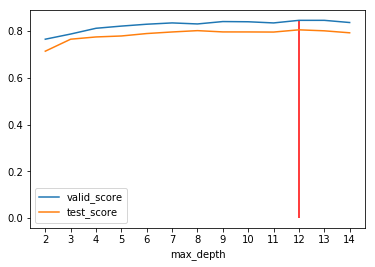

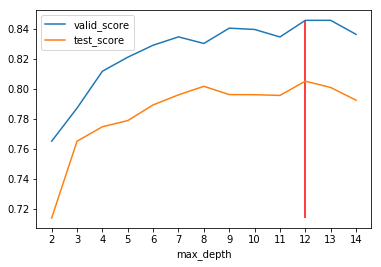

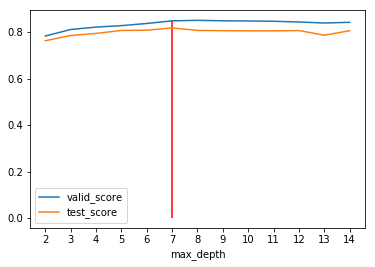

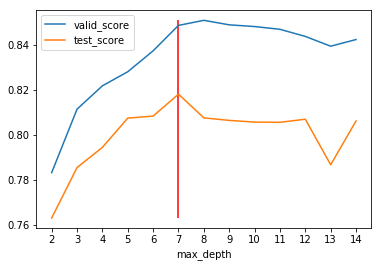

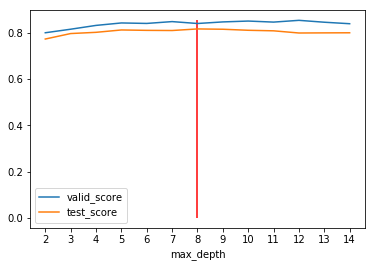

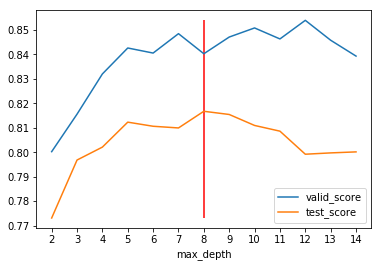

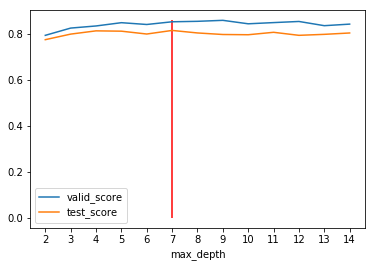

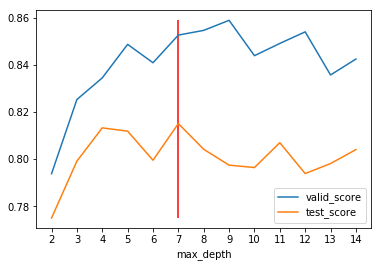

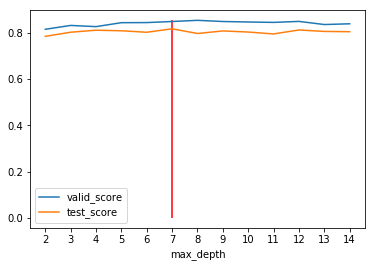

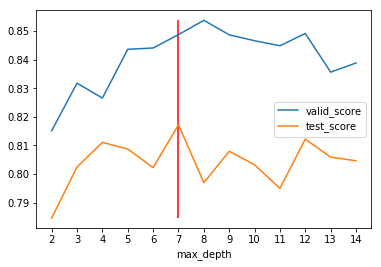

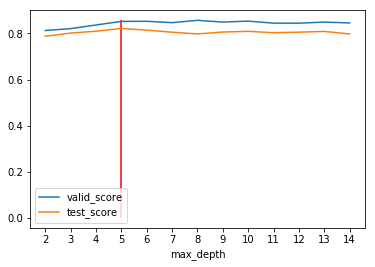

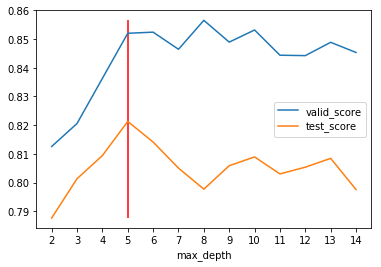

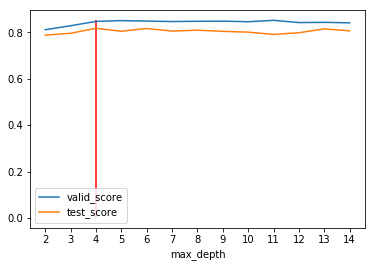

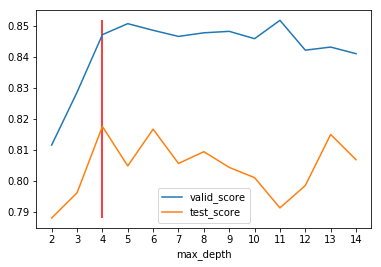

In [24]:
for i in df_grid_old.n_estimator.unique().tolist():
    plotDf(df_grid_old[df_grid_old.n_estimator == i])
    plotDf(df_grid_old[df_grid_old.n_estimator == i],0)

In [26]:
df_grid_old[df_grid_old.test_score == df_grid_old.test_score.max()]

,max_depth,n_estimator,valid_score,test_score
26,5,600,0.852012,0.821286


* With max_depth = 5 & n_estimator = 600 , Validation Score : 0.8520117880280291
* Test Score r2 (post inverse function) :  0.8212855609114366


* As per Competetion Evaluation Metrics :
  * 5.04 % of properties within predicted rent within 1% of actual rent
  * 9.92 % of properties within predicted rent within 2% of actual rent
  * 14.82 % of properties within predicted rent within 3% of actual rent
  * 19.83 % of properties within predicted rent within 4% of actual rent
  * 24.32 % of properties within predicted rent within 5% of actual rent

In [27]:
df_grid_old[df_grid_old.test_score.isin(df_grid_old.test_score.sort_values(ascending=False)[:5])].sort_values(by='test_score')

,max_depth,n_estimator,valid_score,test_score
44,8,300,0.840244,0.816739
39,7,500,0.848778,0.817234
20,4,700,0.847195,0.817531
36,7,200,0.848484,0.817981
26,5,600,0.852012,0.821286


##### Before going further let us check if we can get the actual rent back from our transformations.

##### https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard approach of stacking !!!

In [ ]:
def trytheStackedWay():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    
    train, y_train, valid_x, valid_y = returnTrainTestSet(
            df,
            .8,
            random.randint(1,1000))
    
    df = readTheData('TestData_PA.csv')
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    df_test = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData(df)))
    test, y_test, dummy_x, dummy_y = returnTrainTestSet(
            df_test,
            .9999,
            random.randint(1,1000))
    #train = pd.DataFrame(np.array(train,dtype='float'),columns =train.columns)
    #test = pd.DataFrame(np.array(test,dtype='float'),columns =test.columns)
    #Validation function
    #return train
    train = np.round(np.array(train,dtype='float'),4)
    test = np.round(np.array(test,dtype='float'),4)
    valid_x = np.round(np.array(valid_x,dtype='float'),4)
    
    y_train = np.round(np.array(y_train,dtype='float'),4)
    y_test = np.round(np.array(y_test,dtype='float'),4)
    valid_y = np.round(np.array(valid_y,dtype='float'),4)
    
    n_folds = 5

    def rmsle_cv(model):
        #kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
        #rmse= np.float64(np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf)))
        cv = ShuffleSplit(n_splits=5, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
        cross_cv = cross_val_score(model,train,y_train,cv=cv, scoring='r2')#,n_jobs=3)
        return(np.mean(cross_cv))

    lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                       max_depth=4, max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10, 
                                       loss='huber', random_state =5)

    class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
        def __init__(self, base_models, meta_model, n_folds=5):
            self.base_models = base_models
            self.meta_model = meta_model
            self.n_folds = n_folds

        # We again fit the data on clones of the original models
        def fit(self, X, y):
            #X = X.reset_index()
            #y = y.reset_index()
            self.base_models_ = [list() for x in self.base_models]
            self.meta_model_ = clone(self.meta_model)
            kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

            # Train cloned base models then create out-of-fold predictions
            # that are needed to train the cloned meta-model
            out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
            for i, model in enumerate(self.base_models):
                for train_index, holdout_index in kfold.split(X, y):
                    #print(X.shape,y.shape)
                    instance = clone(model)
                    self.base_models_[i].append(instance)
                    instance.fit(X[train_index], y[train_index])
                    y_pred = instance.predict(X[holdout_index])
                    out_of_fold_predictions[holdout_index, i] = y_pred

            # Now train the cloned  meta-model using the out-of-fold predictions as new feature
            self.meta_model_.fit(out_of_fold_predictions, y)
            return self

        #Do the predictions of all base models on the test data and use the averaged predictions as 
        #meta-features for the final prediction which is done by the meta-model
        def predict(self, X):
            meta_features = np.column_stack([
                np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
                for base_models in self.base_models_ ])
            return self.meta_model_.predict(meta_features)


    stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                     meta_model = lasso)
    def rmsle(y, y_pred):
        return np.sqrt(mean_squared_error(y, y_pred))

    score = rmsle_cv(stacked_averaged_models)
    print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

    stacked_averaged_models.fit(train, y_train)
    stacked_valid_pred = stacked_averaged_models.predict(valid_x)
    stacked_test_pred = stacked_averaged_models.predict(test)
    print("Validation Score RMSE : ", rmsle(valid_y, stacked_valid_pred), "r2 Score : ", r2_score(valid_y, stacked_valid_pred))
    print("Test Score RMSE : ", rmsle(y_test, stacked_test_pred), "r2 Score : ", r2_score(y_test, stacked_test_pred))
    
    printStats(stacked_test_pred, y_test)
    return stacked_averaged_models
#df = trytheStackedWay()
stacked_reg = trytheStackedWay()

##### That is overwhelming response of whooping 89 % validation score. However, there was low testing score 80%. It took around 25 minutes to train and test. But XGBoost gave better result in much less time and gave 81% accuracy.

##### Can we have top 5 XGBoost predictor stacked; leader among the leader :)

In [ ]:
df_grid[df_grid.test_score.isin(df_grid.test_score.sort_values(ascending=False)[:5])].sort_values(by='test_score')

In [ ]:
def checkTheBestOfBest():
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    df = removeOutlier(removeDuplicate(df))
    df = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData((df))))
    
    train, y_train, valid_x, valid_y = returnTrainTestSet(
            df,
            .8,
            random.randint(1,1000))
    
    df = readTheData('TestData_PA.csv')
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    df_test = boxCoxTranformation(getDummiesForBooleanFeatures(preProcessTheData(df)))
    test, y_test, dummy_x, dummy_y = returnTrainTestSet(
            df_test,
            .9999,
            random.randint(1,1000))

    train = np.round(np.array(train,dtype='float'),4)
    test = np.round(np.array(test,dtype='float'),4)
    valid_x = np.round(np.array(valid_x,dtype='float'),4)
    
    y_train = np.round(np.array(y_train,dtype='float'),4)
    y_test = np.round(np.array(y_test,dtype='float'),4)
    valid_y = np.round(np.array(valid_y,dtype='float'),4)
    
    n_folds = 5

    def rmsle_cv(model):
        cv = ShuffleSplit(n_splits=5, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
        cross_cv = cross_val_score(model,train,y_train,cv=cv, scoring='r2')#,n_jobs=3)
        return(np.mean(cross_cv))

    xgb1 = XGBRegressor(max_depth=8,n_estimators=300)
    xgb2 = XGBRegressor(max_depth=8,n_estimators=400)
    xgb3 = XGBRegressor(max_depth=8,n_estimators=500)
    xgb4 = XGBRegressor(max_depth=8,n_estimators=600)
    xgb5 = XGBRegressor(max_depth=8,n_estimators=700)
    lr = LinearRegression()
    
    class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
        def __init__(self, base_models, meta_model, n_folds=5):
            self.base_models = base_models
            self.meta_model = meta_model
            self.n_folds = n_folds

        # We again fit the data on clones of the original models
        def fit(self, X, y):

            self.base_models_ = [list() for x in self.base_models]
            self.meta_model_ = clone(self.meta_model)
            kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=1986)

            # Train cloned base models then create out-of-fold predictions
            # that are needed to train the cloned meta-model
            out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
            for i, model in enumerate(self.base_models):
                for train_index, holdout_index in kfold.split(X, y):
                    instance = clone(model)
                    self.base_models_[i].append(instance)
                    instance.fit(X[train_index], y[train_index])
                    y_pred = instance.predict(X[holdout_index])
                    out_of_fold_predictions[holdout_index, i] = y_pred

            # Now train the cloned  meta-model using the out-of-fold predictions as new feature
            self.meta_model_.fit(out_of_fold_predictions, y)
            return self

        #Do the predictions of all base models on the test data and use the averaged predictions as 
        #meta-features for the final prediction which is done by the meta-model
        def predict(self, X):
            meta_features = np.column_stack([
                np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
                for base_models in self.base_models_ ])
            return self.meta_model_.predict(meta_features)


    stacked_averaged_models = StackingAveragedModels(base_models = (xgb1, xgb2, xgb3, xgb4, xgb5),
                                                     meta_model = lr)
    def rmsle(y, y_pred):
        return np.sqrt(mean_squared_error(y, y_pred))

    score = rmsle_cv(stacked_averaged_models)
    print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

    stacked_averaged_models.fit(train, y_train)
    stacked_valid_pred = stacked_averaged_models.predict(valid_x)
    stacked_test_pred = stacked_averaged_models.predict(test)
    print("Validation Score RMSE : ", rmsle(valid_y, stacked_valid_pred), "r2 Score : ", r2_score(valid_y, stacked_valid_pred))
    print("Test Score RMSE : ", rmsle(y_test, stacked_test_pred), "r2 Score : ", r2_score(y_test, stacked_test_pred))
    
    printStats(stacked_test_pred, y_test)
    return stacked_averaged_models

stacked_xgboost_reg = checkTheBestOfBest()

##### Grid Search indicated the highest score:
* With estimator = 8 , Validation Score : 0.954587266129301 , Testing Score : 0.8119602526551479
* As per Competetion Evaluation Metrics : 
  * 16.36 % of properties within predicted rent within 1% of actual rent
  * 31.31 % of properties within predicted rent within 2% of actual rent
  * 44.9 % of properties within predicted rent within 3% of actual rent
  * 56.5 % of properties within predicted rent within 4% of actual rent
  * 66.16 % of properties within predicted rent within 5% of actual rent
  
##### Stacked XGBoost gave slight better result from testing score perspective and performed better in project metrics too.
* Validation Score RMSE :  0.034703870714892886 r2 Score :  0.9564874701465649
* Test Score RMSE :  0.08349228006653604 r2 Score :  0.8142575701983098
  * 16.4 % of properties within predicted rent within 1% of actual rent
  * 32.13 % of properties within predicted rent within 2% of actual rent
  * 45.89 % of properties within predicted rent within 3% of actual rent
  * 57.18 % of properties within predicted rent within 4% of actual rent
  * 66.01 % of properties within predicted rent within 5% of actual rent

#### Note that even if we have % of properties within 5% range is less we can clearly see that there is increase in the accuracy for samples under 1%, 2%, 3% & 4%. This is as if sharpening the pencil.

##### I have a of stack approaches to try out but holding off till we have reverse transform rent is not done. And moreover, need to see where my stack stands in the Kaggle competetion. So, planning to try the new formula on the new data set.

In [28]:
def checkTheNewBestOfBest():
    
    start_time = datetime.datetime.now()
    df = readTheData('TrainData_PA.csv')
    
    df['rent_per_bed'] = df['rent']/df['bed']
    df=df.drop(['rent'],axis=1)
    df['rent'] = df['rent_per_bed']
    df=df.drop(['rent_per_bed'],axis=1)
    
    df = removeOutlier(removeDuplicate(df))
    X, y = newBoxCoxTranformation(preProcessTheData(df),'rent')
    
    #train, valid_x, y_train, valid_y = train_test_split(X,y,test_size=0.2, random_state=1991)
    
    df_test = readTheData('TestData_PA.csv')
   
    test, y_test = newBoxCoxTranformation((preProcessTheData(df_test)), 'rent')
    
    def rmsle_cv(model, X,y):
        cv = ShuffleSplit(n_splits=3, test_size=random.randint(7,9)/10, random_state=random.randint(1,1000))
        cross_cv = cross_val_score(model,X,y,cv=cv, scoring='r2')#,n_jobs=3)
        return(cross_cv)

    xgb1 = XGBRegressor(max_depth=9,n_estimators=600)
    xgb2 = XGBRegressor(max_depth=8,n_estimators=300)
    xgb3 = XGBRegressor(max_depth=11,n_estimators=400)
    xgb4 = XGBRegressor(max_depth=12,n_estimators=100)
    xgb5 = XGBRegressor(max_depth=10,n_estimators=300)
    lr = LinearRegression()
    
    class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
        def __init__(self, base_models, meta_model, n_folds=5):
            self.base_models = base_models
            self.meta_model = meta_model
            self.n_folds = n_folds

        # We again fit the data on clones of the original models
        def fit(self, X, y):

            self.base_models_ = [list() for x in self.base_models]
            self.meta_model_ = clone(self.meta_model)
            kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=1986)

            # Train cloned base models then create out-of-fold predictions
            # that are needed to train the cloned meta-model
            out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
            for i, model in enumerate(self.base_models):
                for train_index, holdout_index in kfold.split(X, y):
                    instance = clone(model)
                    self.base_models_[i].append(instance)
                    instance.fit(X[train_index], y[train_index])
                    y_pred = instance.predict(X[holdout_index])
                    out_of_fold_predictions[holdout_index, i] = y_pred

            # Now train the cloned  meta-model using the out-of-fold predictions as new feature
            self.meta_model_.fit(out_of_fold_predictions, y)
            return self

        #Do the predictions of all base models on the test data and use the averaged predictions as 
        #meta-features for the final prediction which is done by the meta-model
        def predict(self, X):
            meta_features = np.column_stack([
                np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
                for base_models in self.base_models_ ])
            return self.meta_model_.predict(meta_features)


    stacked_averaged_models = StackingAveragedModels(base_models = (xgb1, xgb2, xgb3, xgb4, xgb5),
                                                     meta_model = lr)
    def rmsle(y, y_pred):
        return np.sqrt(mean_squared_error(y, y_pred))

    score = rmsle_cv(stacked_averaged_models, X, y)
    print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

    stacked_averaged_models.fit(X, y)
    #stacked_valid_pred = stacked_averaged_models.predict(valid_x)
    df_test['pred_rent_per_bed'] = np.exp(stacked_averaged_models.predict(test))
    df_test['pred_rent'] = df_test['pred_rent_per_bed'] * df_test['bed']
    #stacked_test_pred = np.array(df_test['pred_rent'].tolist())
    
    #print("Validation Score RMSE : ", rmsle(valid_y, stacked_valid_pred), "r2 Score : ", r2_score(valid_y, stacked_valid_pred))
    #print("Test Score RMSE : ", rmsle(y_test, stacked_test_pred), "r2 Score : ", r2_score(y_test, stacked_test_pred))
    print("Test Score r2 (post inverse function) : ", r2_score(df_test.rent, df_test.pred_rent))
    
    #printStats(stacked_test_pred, y_test)
    print("\n\nAs per Competetion Evaluation Metrics :")
    printStats(df_test.pred_rent, df_test.rent)
    
    
    print("\n\nTotal time taken by the stack approach : ",datetime.datetime.now() - start_time )

    return stacked_averaged_models, df_test

stacked_xgboost_reg_new, df_test = checkTheNewBestOfBest()

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Shape of the dataset after transformation :  (18079, 43) (18079,)
Shape of the data set before transforming :  (12132, 40)
Shape of the data set after transforming :  (12132, 44) 

Shape of the dataset before transformation :  (12132, 44)


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Shape of the dataset after transformation :  (12132, 43) (12132,)
Stacking Averaged models score: 0.8476 (0.0006)
Test Score r2 (post inverse function) :  0.8365043171462766


As per Competetion Evaluation Metrics :
6.03 % of properties within predicted rent within 1% of actual rent
11.78 % of properties within predicted rent within 2% of actual rent
17.28 % of properties within predicted rent within 3% of actual rent
22.71 % of properties within predicted rent within 4% of actual rent
27.83 % of properties within predicted rent within 5% of actual rent


Total time taken by the stack approach :  0:58:36.843555


In [29]:
df_test[['rent','bed','pred_rent_per_bed','pred_rent']]

,rent,bed,pred_rent_per_bed,pred_rent
0,1420,2,578.204581,1156.409162
1,1750,3,557.364598,1672.093793
2,825,2,412.754267,825.508533
3,1250,2,633.422324,1266.844647
4,1045,3,373.808817,1121.426451
5,1025,3,337.418107,1012.254322
6,595,1,679.127328,679.127328
7,625,1,757.366023,757.366023
8,1000,3,296.204976,888.614927
9,1425,2,642.087586,1284.175173


##### Best Score with single XGBoost (without stacked approach):
* With max_depth = 10 & n_estimator = 300 , Validation Score : 0.8648154590804821
* Test Score r2 (post inverse function) : 0.8324510160801218
* As per Competetion Evaluation Metrics :
  * 5.43 % of properties within predicted rent within 1% of actual rent
  * 10.83 % of properties within predicted rent within 2% of actual rent
  * 16.01 % of properties within predicted rent within 3% of actual rent
  * 21.34 % of properties within predicted rent within 4% of actual rent
  * 26.49 % of properties within predicted rent within 5% of actual rent

##### Best Score With Stacked Approach:

In [31]:
printStats(df_test.rent,df_test.pred_rent)

6.01 % of properties within predicted rent within 1% of actual rent
11.82 % of properties within predicted rent within 2% of actual rent
17.27 % of properties within predicted rent within 3% of actual rent
22.68 % of properties within predicted rent within 4% of actual rent
27.81 % of properties within predicted rent within 5% of actual rent
